In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [ ]:
def del_cols(df, algos, feats=["OOA", "Duration", "|S|"]):
    for feat in feats:
        for algo in algos:
            del df[feat + "_" + algo]
    return df
            
def rename_cols(df, rn_dict, feats=["OOA", "Duration", "|S|"]):
    for feat in feats:
        for k, v in rn_dict.items():
            df.rename(columns={feat + "_" + k: feat + "_" + v}, inplace=True)
    return df

In [11]:
save_images = False
sep = ","
enc = "utf-8"
file_base = "baseline.csv"
file_mesh = "mesh.csv"
file_base1 = "baseline1.csv"
file_mesh1 = "mesh1.csv"

#algos = ["cp", "vccs", "svgs", "plink"]
algos = ["cp", "vccs", "svgs", "plink", "vccs_oh"]
#algos = ["vccs", "svgs", "plink"]

In [304]:
df_base = pd.read_csv(file_base, sep=sep, header=0, encoding=enc)
df_base = del_cols(df=df_base, algos=["plink", "svgs"])
df_base = rename_cols(df=df_base, rn_dict={"vccs": "vccs_oh"})

df_mesh = pd.read_csv(file_mesh, sep=sep, header=0, encoding=enc)
df_mesh = del_cols(df=df_mesh, algos=["plink", "svgs"])
df_mesh = rename_cols(df=df_mesh, rn_dict={"vccs": "vccs_oh"})

In [305]:
df = pd.merge(df_base, df_mesh, how ="inner", on =["Name"], suffixes=["_P", "_M"])
print(df.columns)

Index(['Unnamed: 0_B', 'ID_B', 'Name', '|V|_B', 'OOA_cp_B', '|S|_cp_B',
       'Duration_cp_B', 'OOA_vccs_oh_B', '|S|_vccs_oh_B', 'Duration_vccs_oh_B',
       'OOA_vgs', '|S|_vgs', 'Duration_vgs', 'Unnamed: 0_M', 'ID_M', '|V|_M',
       'OOA_cp_M', '|S|_cp_M', 'Duration_cp_M', 'OOA_vccs_oh_M',
       '|S|_vccs_oh_M', 'Duration_vccs_oh_M'],
      dtype='object')


In [306]:
df_base1 = pd.read_csv(file_base1, sep=sep, header=0, encoding=enc)
df_base1 = del_cols(df=df_base1, algos=["cp"])

df_mesh1 = pd.read_csv(file_mesh1, sep=sep, header=0, encoding=enc)
df_mesh1 = del_cols(df=df_mesh1, algos=["cp"])
#print(df_mesh1.columns)

df1 = pd.merge(df_base1, df_mesh1, how ="inner", on =["Name"], suffixes=["_P", "_M"])

frames = []
frames1 = []
scenes = []
for i in range(len(df1["Name"])):
    scene_name = df1["Name"].iloc[i]
    if scene_name in scenes:
        continue
    scenes.append(scene_name)
    df_ = df.loc[df["Name"] == scene_name]
    if len(df_) == 0:
        continue
    df__ = df1.loc[df1["Name"] == scene_name]
    if len(df_) == 2:
        continue
    #print(len(df_))
    frames.append(df_)
    frames1.append(df__)
df_ = pd.concat(frames)
df_.to_csv("./d1.csv")
df__ = pd.concat(frames1)
df__.to_csv("./d2.csv")
####################################################
# Attention: we combined d1.csv with d2.csv in excel
####################################################
for col in ['Unnamed: 0_B', 'ID_B', 'Name', '|V|_B', 'OOA_vgs', '|S|_vgs',
       'Duration_vgs', 'Unnamed: 0_M', 'ID_M', '|V|_M']:
    del df__[col]

In [63]:
file = "stats.csv"
df = pd.read_csv(file, sep=sep, header=0, encoding=enc)

In [64]:
print(df.columns)
print(df.shape)
#print(df)

Index(['OOA_cp_P', '|S|_cp_P', 'Duration_cp_P', 'OOA_vccs_oh_P',
       '|S|_vccs_oh_P', 'Duration_vccs_oh_P', 'OOA_vgs', '|S|_vgs',
       'Duration_vgs', 'OOA_cp_M', '|S|_cp_M', 'Duration_cp_M',
       'OOA_vccs_oh_M', '|S|_vccs_oh_M', 'Duration_vccs_oh_M', 'Name',
       'OOA_vccs_P', '|S|_vccs_P', 'Duration_vccs_P', 'OOA_plink_P',
       '|S|_plink_P', 'Duration_plink_P', 'OOA_svgs_P', '|S|_svgs_P',
       'Duration_svgs_P', 'OOA_vccs_M', '|S|_vccs_M', 'Duration_vccs_M',
       'OOA_plink_M', '|S|_plink_M', 'Duration_plink_M', 'OOA_svgs_M',
       '|S|_svgs_M', 'Duration_svgs_M'],
      dtype='object')
(143, 34)


In [65]:
#df.to_csv("./comp.csv")

In [66]:
def plot_alg_box(df, alg_name, feat="OOA", suffixes=["_P", "_M"], ylabel=None):
    col_names = []
    title = feat + "_" + alg_name
    for i in range(len(suffixes)):
        suffix = suffixes[i]
        col_name = feat + "_" + alg_name + suffix
        col_names.append(col_name)
    sub_df = df.loc[:, col_names]
    sub_df.plot(kind="box", figsize=(12,8), rot=90, title=title, grid=True, showmeans=True, ylabel=ylabel)

In [67]:
def plot_all_alg_box(df, algos=["cp", "vccs", "svgs", "plink"], feat="OOA", suffixes=["_P", "_M"],
         ylabel=None, special_col=None, print_latex=False, ylim=None, figsize=(12,8), yticks=None):
    col_names = []
    title = feat
    for j in range(len(algos)):
        alg_name = algos[j]
        for i in range(len(suffixes)):
            suffix = suffixes[i]
            col_name = feat + "_" + alg_name + suffix
            col_names.append(col_name)
    if special_col is not None:
        col_names.append(special_col)
    sub_df = df.loc[:, col_names]
    
    n_col_names = {}
    for j in range(len(algos)):
        alg_name = algos[j]
        for i in range(len(suffixes)):
            suffix = suffixes[i]
            col_name = feat + "_" + alg_name + suffix
            n_col_name = alg_name + suffix
            n_col_names[col_name] = n_col_name
    if special_col is not None:
        n_col_names[special_col] = special_col[len(feat)+1:]
    if len(n_col_names) > 0:
        sub_df.rename(columns=n_col_names, inplace=True)
    
    if print_latex:
        df_desc = sub_df.describe(include="all")
        #print(df_desc)
        df_desc = df_desc.loc[["mean", "std", "25%", "50%", "75%"]]
        #df_desc = df_desc * val_multiplier
        latex_str = df_desc.to_latex(escape=False, float_format="%.2f")
        latex_str = latex_str.replace("_", "\_")
        latex_str = latex_str.replace("%", "\%")
        latex_str = latex_str.replace("|S|", "$|\mathcal{S}|$")
        
        print(latex_str)
    sub_df.plot(kind="box", figsize=figsize, rot=90, title=title, grid=True, showmeans=True, ylabel=ylabel,
        ylim=ylim, yticks=yticks)

\begin{tabular}{lrrrrrrrrrrr}
\toprule
{} &  cp\_P &  cp\_M &  vccs\_P &  vccs\_M &  svgs\_P &  svgs\_M &  plink\_P &  plink\_M &  vccs\_oh\_P &  vccs\_oh\_M &  vgs \\
\midrule
mean &  0.84 &  0.86 &    0.90 &    0.91 &    0.83 &    0.92 &     0.82 &     0.86 &       0.67 &       0.73 & 0.77 \\
std  &  0.08 &  0.07 &    0.04 &    0.04 &    0.21 &    0.03 &     0.07 &     0.05 &       0.09 &       0.10 & 0.09 \\
25\%  &  0.80 &  0.81 &    0.87 &    0.88 &    0.86 &    0.89 &     0.77 &     0.82 &       0.60 &       0.66 & 0.69 \\
50\%  &  0.84 &  0.86 &    0.90 &    0.91 &    0.89 &    0.92 &     0.82 &     0.86 &       0.66 &       0.74 & 0.77 \\
75\%  &  0.90 &  0.91 &    0.93 &    0.93 &    0.93 &    0.94 &     0.87 &     0.90 &       0.74 &       0.81 & 0.84 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrrrrrrrr}
\toprule
{} &   cp\_P &   cp\_M &  vccs\_P &  vccs\_M &  svgs\_P &  svgs\_M &  plink\_P &  plink\_M &  vccs\_oh\_P &  vccs\_oh\_M &   vgs \\
\midrule
mean & 255.29 & 28

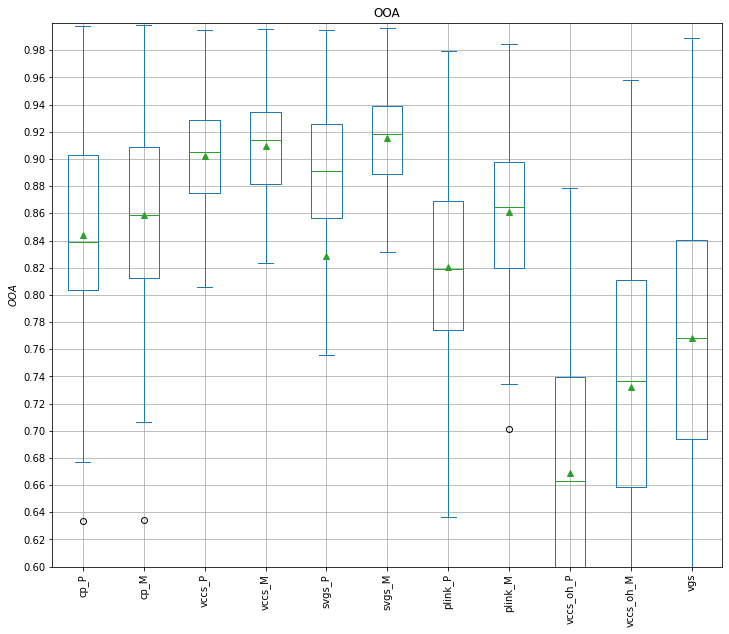

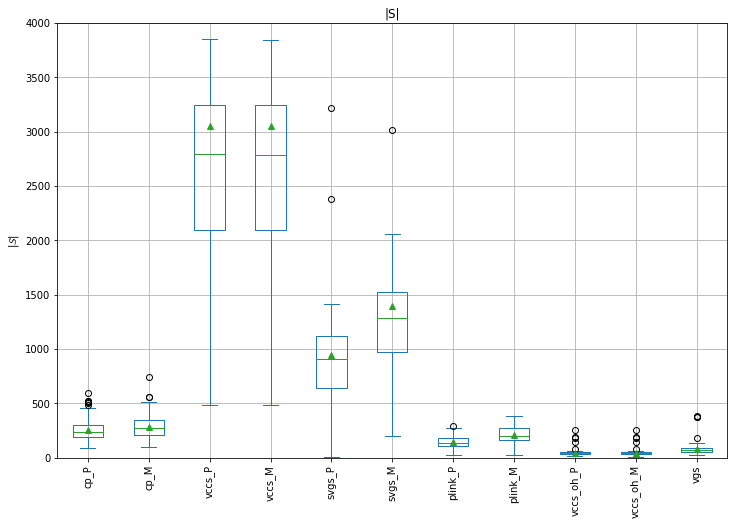

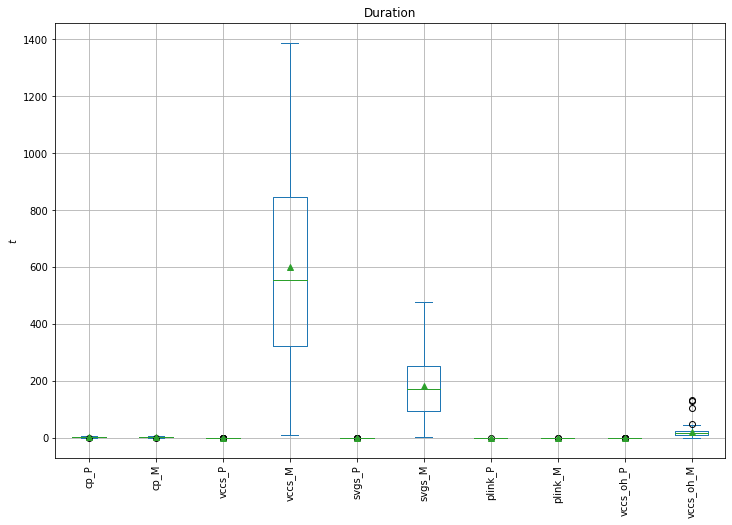

In [68]:
plot_all_alg_box(df=df, feat="OOA", ylabel=r"$OOA$", special_col="OOA_vgs", print_latex=True,
     algos=algos, ylim=(0.6, 1.0), figsize=(12,10), yticks=np.arange(0.6, 1.0, 0.02))
plt.savefig("../figures/ooa.png", bbox_inches="tight")
plot_all_alg_box(df=df, feat="|S|", ylabel=r"$|\mathcal{S}|$", special_col="|S|_vgs", print_latex=True,
     algos=algos, ylim=(0, 4000))
plt.savefig("../figures/sizes.png", bbox_inches="tight")
plot_all_alg_box(df=df, feat="Duration", ylabel=r"$t$", algos=algos)

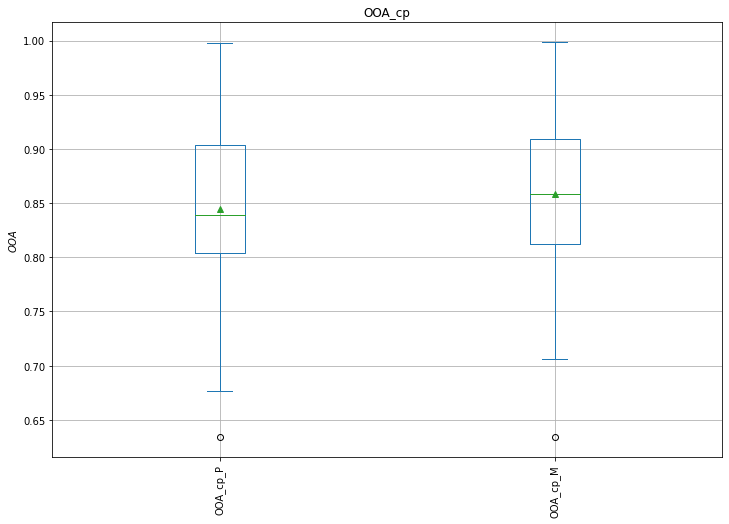

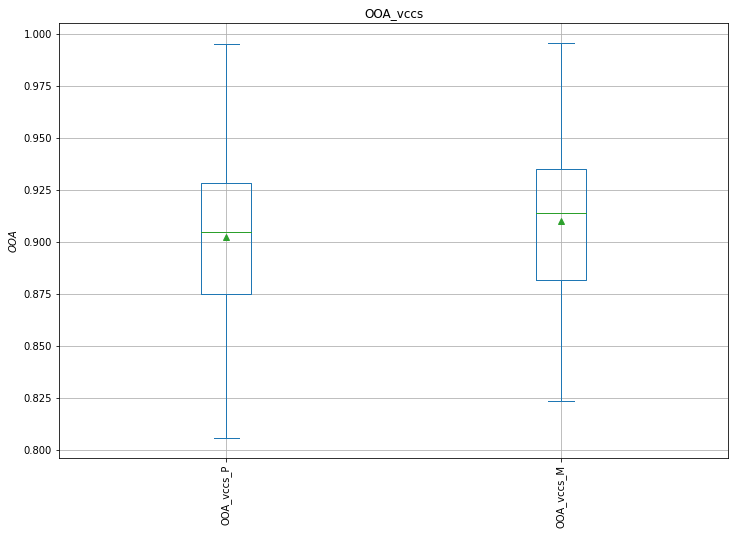

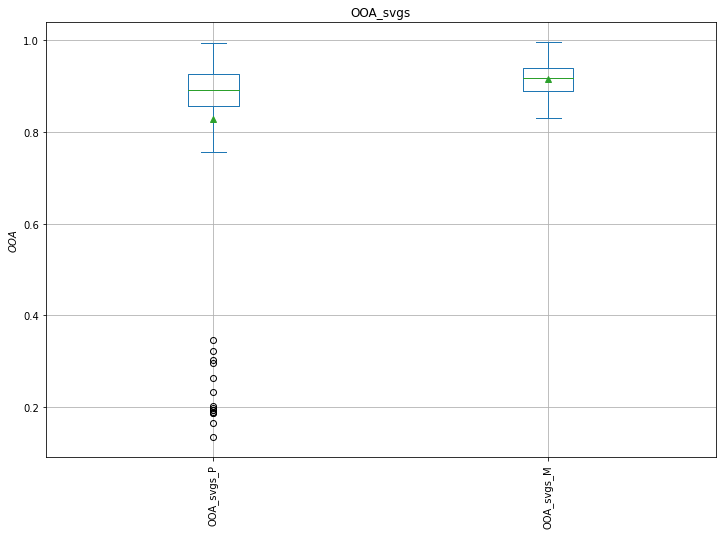

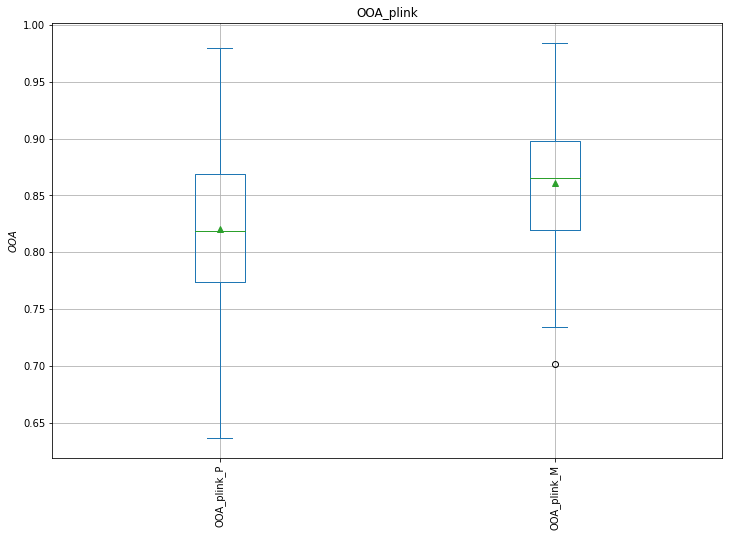

In [69]:
if "cp" in algos:
    plot_alg_box(df=df, alg_name="cp", feat="OOA", ylabel=r"$OOA$")
if "vccs" in algos:
    plot_alg_box(df=df, alg_name="vccs", feat="OOA", ylabel=r"$OOA$")
if "svgs" in algos:
    plot_alg_box(df=df, alg_name="svgs", feat="OOA", ylabel=r"$OOA$")
if "plink" in algos:
    plot_alg_box(df=df, alg_name="plink", feat="OOA", ylabel=r"$OOA$")
if "vgs" in algos:
    plot_alg_box(df=df, alg_name="vgs", feat="OOA", suffixes=[""], ylabel=r"$OOA$")

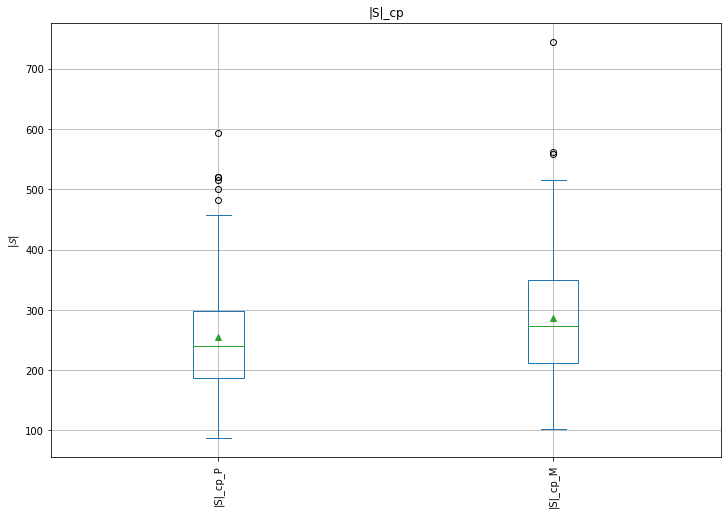

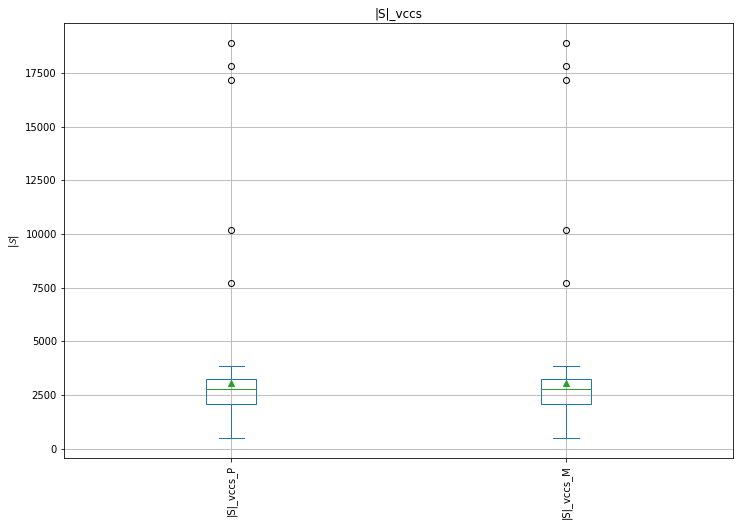

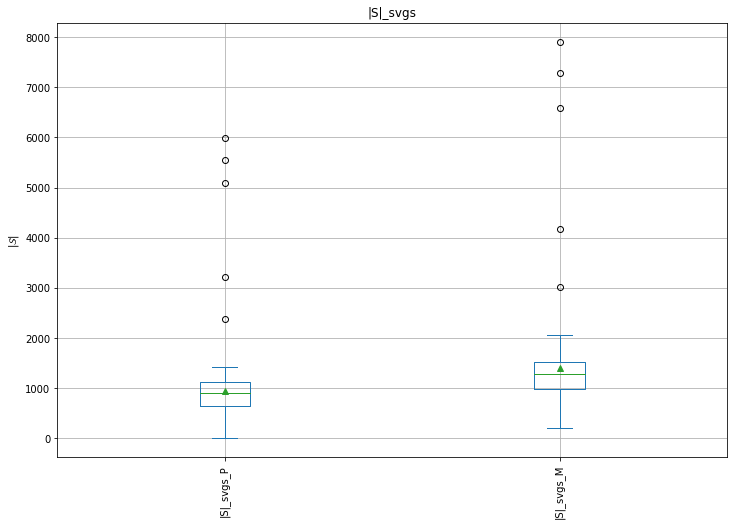

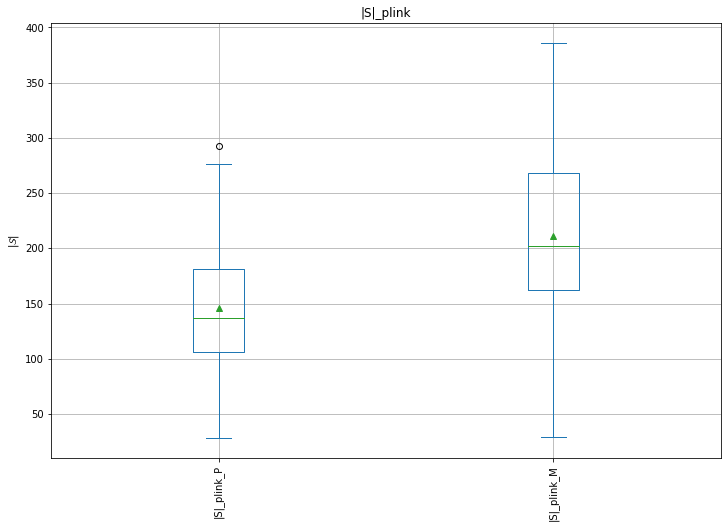

In [70]:
if "cp" in algos:
    plot_alg_box(df=df, alg_name="cp", feat="|S|", ylabel=r"$|\mathcal{S}|$")
if "vccs" in algos:
    plot_alg_box(df=df, alg_name="vccs", feat="|S|", ylabel=r"$|\mathcal{S}|$")
if "svgs" in algos:
    plot_alg_box(df=df, alg_name="svgs", feat="|S|", ylabel=r"$|\mathcal{S}|$")
if "plink" in algos:
    plot_alg_box(df=df, alg_name="plink", feat="|S|", ylabel=r"$|\mathcal{S}|$")
if "vgs" in algos:
    plot_alg_box(df=df, alg_name="vgs", feat="|S|", suffixes=[""], ylabel=r"$|\mathcal{S}|$")

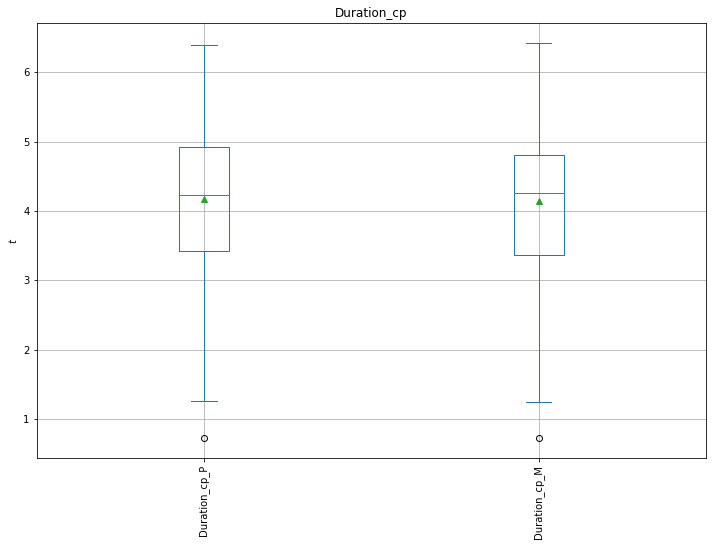

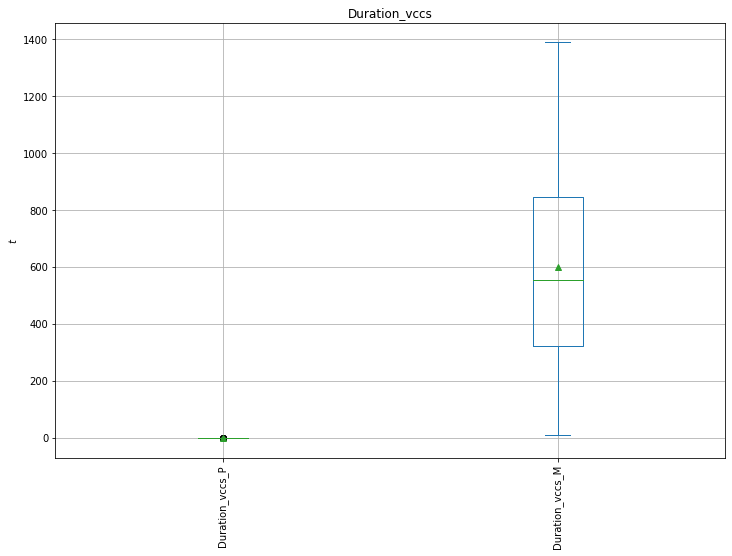

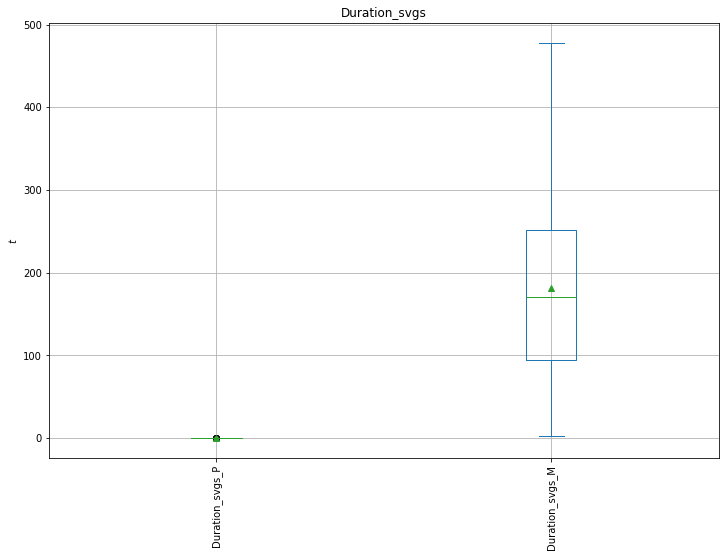

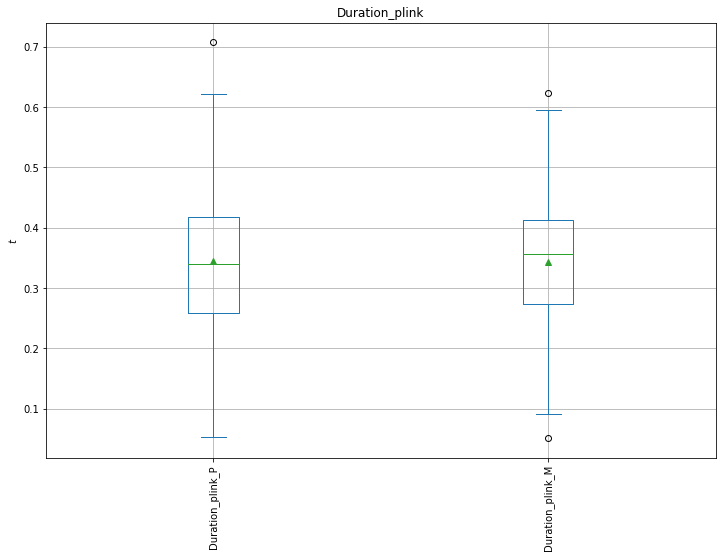

In [71]:
if "cp" in algos:
    plot_alg_box(df=df, alg_name="cp", feat="Duration", ylabel=r"$t$")
if "vccs" in algos:
    plot_alg_box(df=df, alg_name="vccs", feat="Duration", ylabel=r"$t$")
if "svgs" in algos:
    plot_alg_box(df=df, alg_name="svgs", feat="Duration", ylabel=r"$t$")
if "plink" in algos:
    plot_alg_box(df=df, alg_name="plink", feat="Duration", ylabel=r"$t$")
if "vgs" in algos:
    plot_alg_box(df=df, alg_name="vgs", feat="Duration", suffixes=[""], ylabel=r"$t$")

In [72]:
def outliers_idxs(arr):    
    q025 = np.quantile(a=arr, q=0.25, axis=0)
    q075 = np.quantile(a=arr, q=0.75, axis=0)
    iqr = q075 - q025
    lb = q025 - 1.5 * iqr
    ub = q075 + 1.5 * iqr
    mask = (arr >= ub) | (arr <= lb)
    out_rows = np.where(mask == True)[0]
    return out_rows


def ut_test(df, alg_name, alpha=0.05, feat="OOA", suffixes=["_P", "_M"]):
    col_names = []
    title = feat + "_" + alg_name
    print(title)
    if len(suffixes) != 2:
        raise Exception("Cannot apply u- or t-Test")
    for i in range(len(suffixes)):
        suffix = suffixes[i]
        col_name = feat + "_" + alg_name + suffix
        col_names.append(col_name)
    sub_df = df.loc[:, col_names]
    
    idxs_0 = outliers_idxs(arr=sub_df[col_names[0]].to_numpy())
    idxs_1 = outliers_idxs(arr=sub_df[col_names[1]].to_numpy())
    out_idxs = np.vstack((idxs_0[:, None], idxs_1[:, None]))
    out_idxs = np.unique(out_idxs)
    print("Remove {0} outliers".format(out_idxs.shape[0]))
    remaining_idxs = np.arange(df.shape[0], dtype=np.uint32)
    remaining_idxs = np.delete(remaining_idxs, out_idxs)
    sub_df = sub_df.iloc[remaining_idxs, :]
    
    is_normal = True
    for i in range(len(col_names)):
        col_name = col_names[i]
        _, p_val = st.shapiro(sub_df[col_name])
        is_col_normal = p_val < alpha
        print("{0} is normal: {1} (p={2})".format(col_name, is_col_normal, p_val))
        is_normal = is_normal and is_col_normal
    _, p_val = st.bartlett(sub_df[col_names[0]], sub_df[col_names[1]])
    equal_var = p_val < alpha
    print("Equal variance: {0} (p={1})".format(equal_var, p_val))
    if is_normal and equal_var:
        _, p_val = st.ttest_ind(a=sub_df[col_names[0]], b=sub_df[col_names[1]])
        significant = p_val < alpha
        print("T-Test for {0} is significant: {1} (p={2:.5f})".format(title, significant, p_val))
    else:
        _, p_val = st.mannwhitneyu(x=sub_df[col_names[0]], y=sub_df[col_names[1]])
        significant = p_val < alpha
        print("U-Test for {0} is significant: {1} (p={2:.5f})".format(title, significant, p_val))

In [73]:
if "cp" in algos:
    ut_test(df=df, alg_name="cp", feat="OOA")
    print("")
if "vccs" in algos:
    ut_test(df=df, alg_name="vccs", feat="OOA")
    print("")
if "vccs_oh" in algos:
    ut_test(df=df, alg_name="vccs_oh", feat="OOA")
    print("")
if "svgs" in algos:
    ut_test(df=df, alg_name="svgs", feat="OOA")
    print("")
if "plink" in algos:
    ut_test(df=df, alg_name="plink", feat="OOA")

OOA_cp
Remove 1 outliers
OOA_cp_P is normal: True (p=0.04560455307364464)
OOA_cp_M is normal: False (p=0.12888722121715546)
Equal variance: False (p=0.3530492473678901)
U-Test for OOA_cp is significant: False (p=0.06658)

OOA_vccs
Remove 0 outliers
OOA_vccs_P is normal: False (p=0.44454294443130493)
OOA_vccs_M is normal: False (p=0.3244912922382355)
Equal variance: False (p=0.3614490827634085)
U-Test for OOA_vccs is significant: False (p=0.09045)

OOA_vccs_oh
Remove 0 outliers
OOA_vccs_oh_P is normal: False (p=0.4488565921783447)
OOA_vccs_oh_M is normal: False (p=0.20555756986141205)
Equal variance: False (p=0.6904665855658745)
U-Test for OOA_vccs_oh is significant: True (p=0.00000)

OOA_svgs
Remove 15 outliers
OOA_svgs_P is normal: False (p=0.44080352783203125)
OOA_svgs_M is normal: False (p=0.16630591452121735)
Equal variance: True (p=0.0295607540915505)
U-Test for OOA_svgs is significant: True (p=0.00175)

OOA_plink
Remove 1 outliers
OOA_plink_P is normal: False (p=0.811891138553619

In [74]:
if "cp" in algos:
    ut_test(df=df, alg_name="cp", feat="|S|")
    print("")
if "vccs" in algos:
    ut_test(df=df, alg_name="vccs", feat="|S|")
    print("")
if "vccs_oh" in algos:
    ut_test(df=df, alg_name="vccs_oh", feat="|S|")
    print("")
if "svgs" in algos:
    ut_test(df=df, alg_name="svgs", feat="|S|")
    print("")
if "plink" in algos:
    ut_test(df=df, alg_name="plink", feat="|S|")

|S|_cp
Remove 6 outliers
|S|_cp_P is normal: False (p=0.16622565686702728)
|S|_cp_M is normal: False (p=0.17590008676052094)
Equal variance: False (p=0.16422625848476657)
U-Test for |S|_cp is significant: True (p=0.00525)

|S|_vccs
Remove 5 outliers
|S|_vccs_P is normal: True (p=0.0006764282588846982)
|S|_vccs_M is normal: True (p=0.0006661119987256825)
Equal variance: False (p=0.99710976754324)
U-Test for |S|_vccs is significant: False (p=0.97654)

|S|_vccs_oh
Remove 5 outliers
|S|_vccs_oh_P is normal: False (p=0.42316338419914246)
|S|_vccs_oh_M is normal: False (p=0.38653668761253357)
Equal variance: False (p=0.9311956020254448)
U-Test for |S|_vccs_oh is significant: False (p=0.90331)

|S|_svgs
Remove 5 outliers
|S|_svgs_P is normal: True (p=4.610957393680337e-09)
|S|_svgs_M is normal: False (p=0.10186527669429779)
Equal variance: False (p=0.5319190611470388)
U-Test for |S|_svgs is significant: True (p=0.00000)

|S|_plink
Remove 1 outliers
|S|_plink_P is normal: False (p=0.1132062822

In [75]:
if "cp" in algos:
    ut_test(df=df, alg_name="cp", feat="Duration")
    print("")
if "vccs" in algos:
    ut_test(df=df, alg_name="vccs", feat="Duration")
    print("")
if "vccs_oh" in algos:
    ut_test(df=df, alg_name="vccs_oh", feat="|S|")
    print("")
if "svgs" in algos:
    ut_test(df=df, alg_name="svgs", feat="Duration")
    print("")
if "plink" in algos:
    ut_test(df=df, alg_name="plink", feat="Duration")

Duration_cp
Remove 1 outliers
Duration_cp_P is normal: False (p=0.6368415951728821)
Duration_cp_M is normal: False (p=0.6875562071800232)
Equal variance: False (p=0.9364568471295535)
U-Test for Duration_cp is significant: False (p=0.72494)

Duration_vccs
Remove 5 outliers
Duration_vccs_P is normal: False (p=0.2957560420036316)
Duration_vccs_M is normal: True (p=0.0018768039299175143)
Equal variance: True (p=0.0)
U-Test for Duration_vccs is significant: True (p=0.00000)

|S|_vccs_oh
Remove 5 outliers
|S|_vccs_oh_P is normal: False (p=0.42316338419914246)
|S|_vccs_oh_M is normal: False (p=0.38653668761253357)
Equal variance: False (p=0.9311956020254448)
U-Test for |S|_vccs_oh is significant: False (p=0.90331)

Duration_svgs
Remove 4 outliers
Duration_svgs_P is normal: False (p=0.4307681620121002)
Duration_svgs_M is normal: True (p=0.0007913964218460023)
Equal variance: True (p=0.0)
U-Test for Duration_svgs is significant: True (p=0.00000)

Duration_plink
Remove 3 outliers
Duration_plink_